# Problem Statement

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

We as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective 

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

### Data points

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import the necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

### 1. Load the input data set and check for data types, size

In [2]:
df = pd.read_csv("Loan_Modelling.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string


There are 5000 rows and 14 columns.


In [6]:
df.shape

(5000, 14)

In [7]:
df.size

70000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We don't have any missing values in our data set.

### 2. Checking columns to identify which columns can be used as categorical columns

In [9]:
#1. First let's check family
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [10]:
#Since it has a limited set of values, this column can become a categorical column.

In [11]:
#2. Now let's check education column
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [12]:
#Since it has a limited set of values, this column can become a categorical column.

In [13]:
#3. Now let's check education column
df['Securities_Account'].value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

In [14]:
#Since it has a limited set of values, this column can become a categorical column.

In [15]:
#4. Now let's check CD_Account column
df['CD_Account'].value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

In [16]:
#Since it has a limited set of values, this column can become a categorical column.

In [17]:
#5. Now let's check online column
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [18]:
#Since it has a limited set of values, this column can become a categorical column.

In [19]:
#6. Now let's check credit card column
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [20]:
#Since it has a limited set of values, this column can become a categorical column.

Now let's convert those 6 columns (some of which are binary columns) into categorical columns

In [21]:
col_list = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

In [22]:
#convert family into categorical data type
df.Family = df.Family.astype('category')

#convert education into categorical data type
df.Education = df.Education.astype('category')

#convert Securities_Account into categorical data type
df.Securities_Account = df.Securities_Account.astype('category')

#convert CD_Account into categorical data type
df.CD_Account = df.CD_Account.astype('category')

#convert Online into categorical data type
df.Online = df.Online.astype('category')

#convert CreditCard into categorical data type
df.CreditCard = df.CreditCard.astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.7 KB


### 3. Describing the floating variables

In [24]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,1.937938,56.498800,0.096000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.747659,101.713802,0.294621
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000,1.000000


### Observations:
1. Mean age of customers is around 45 years, average experience of customers is 20 years, average income of customers is $73K, average spending on credit card per month is $1937, average mortage is $56.5.

2. 50% of our customers are 45 years or younger/older. 50% of our customers have $64K or less as salary. 50% of our customers have credit card spending of $2500 and 50% of our customers have their mortgage as $101K or less.

### 4. Univariate analysis

#### 4.1 Study of the age of our customers

<AxesSubplot:xlabel='Age', ylabel='Count'>

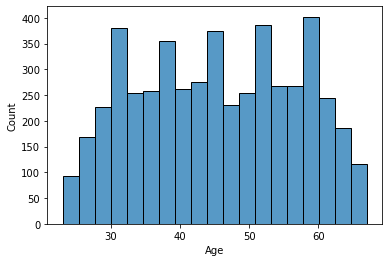

In [25]:
#Histogram of the age of the customers
sns.histplot(df.Age)

Observations:
1. Average age and median age (both) are close to 45 years.
2. The graph is not skewed. 

<AxesSubplot:>

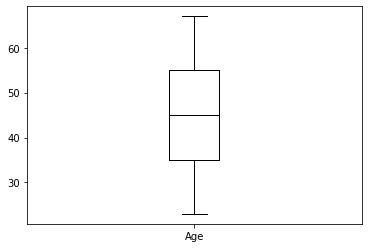

In [26]:
#Boxplot of the age of our customers.
df.boxplot(column=['Age'], grid=False, color='black')

#### 4.2 Study of the experience (number of years) of our customers

<AxesSubplot:xlabel='Experience', ylabel='Count'>

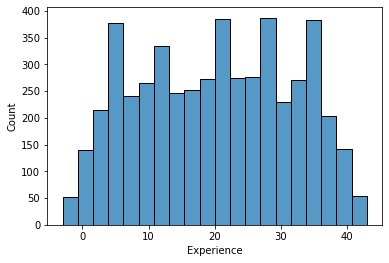

In [27]:
#Histogram of the experience of the customers
sns.histplot(df.Experience)

Observations:
1. Average experience and median experience (both) are close to 20 years.
2. The graph is not skewed. 

<AxesSubplot:>

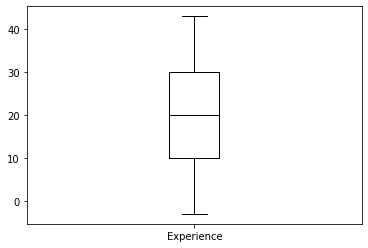

In [28]:
#Boxplot of the experience of our customers.
df.boxplot(column=['Experience'], grid=False, color='black')

#### 4.3 Study of the income of our customers

<AxesSubplot:xlabel='Income', ylabel='Count'>

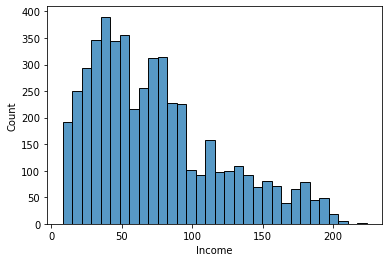

In [29]:
#Histogram of the income of the customers
sns.histplot(df.Income)

Observations:

1. Average income of our customers is close to $73K.
2. The graph is right skewed.

<AxesSubplot:>

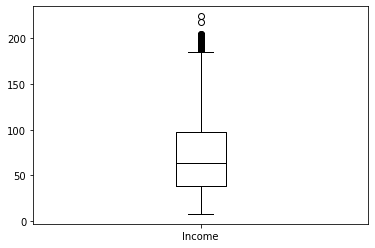

In [30]:
#Boxplot of the income of our customers.
df.boxplot(column=['Income'], grid=False, color='black')

Observations: We can see some outliers in the boxplot.

#### 4.4 Study of the average credit card spending of our customers

<AxesSubplot:xlabel='CCAvg', ylabel='Count'>

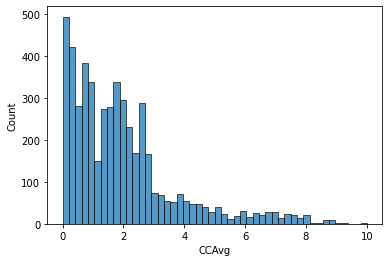

In [31]:
#Histogram of the average credit card spending of the customers
sns.histplot(df.CCAvg)

Observations:

1. Average credit card spending of our customers is close to $1973 per month. 

2. 50% of our customers spend $1500 or less. Median is less than mean.
3. The graph is right skewed.

4. Many customers have $0 spending, which is fine because not everyone uses credit cards.

<AxesSubplot:>

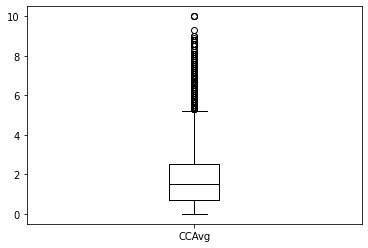

In [32]:
#Boxplot of the average credit card spending of our customers.
df.boxplot(column=['CCAvg'], grid=False, color='black')

Observations: There are a lot of outliers in our graph.

#### 4.5 Study of the mortgage amounts of our customers

<AxesSubplot:xlabel='Mortgage', ylabel='Count'>

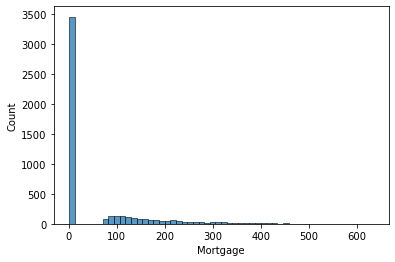

In [33]:
#Histogram of the mortgage amounts of the customers
sns.histplot(df.Mortgage)

Observations:
    
1. We see many customers have no mortgage, which is okay because not everyone stays in their own house.
2. The graph is right skewed.

<AxesSubplot:>

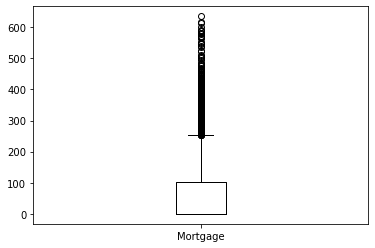

In [34]:
#Boxplot of the mortgage amounts of our customers.
df.boxplot(column=['Mortgage'], grid=False, color='black')

Observations: All outliers are basically values that are to be handled as a part of the data set.

### 5. Bivariate Analysis

#### 5.1 Use Pairplot to show relationship of each numerical column with other column when compared with prior loan.

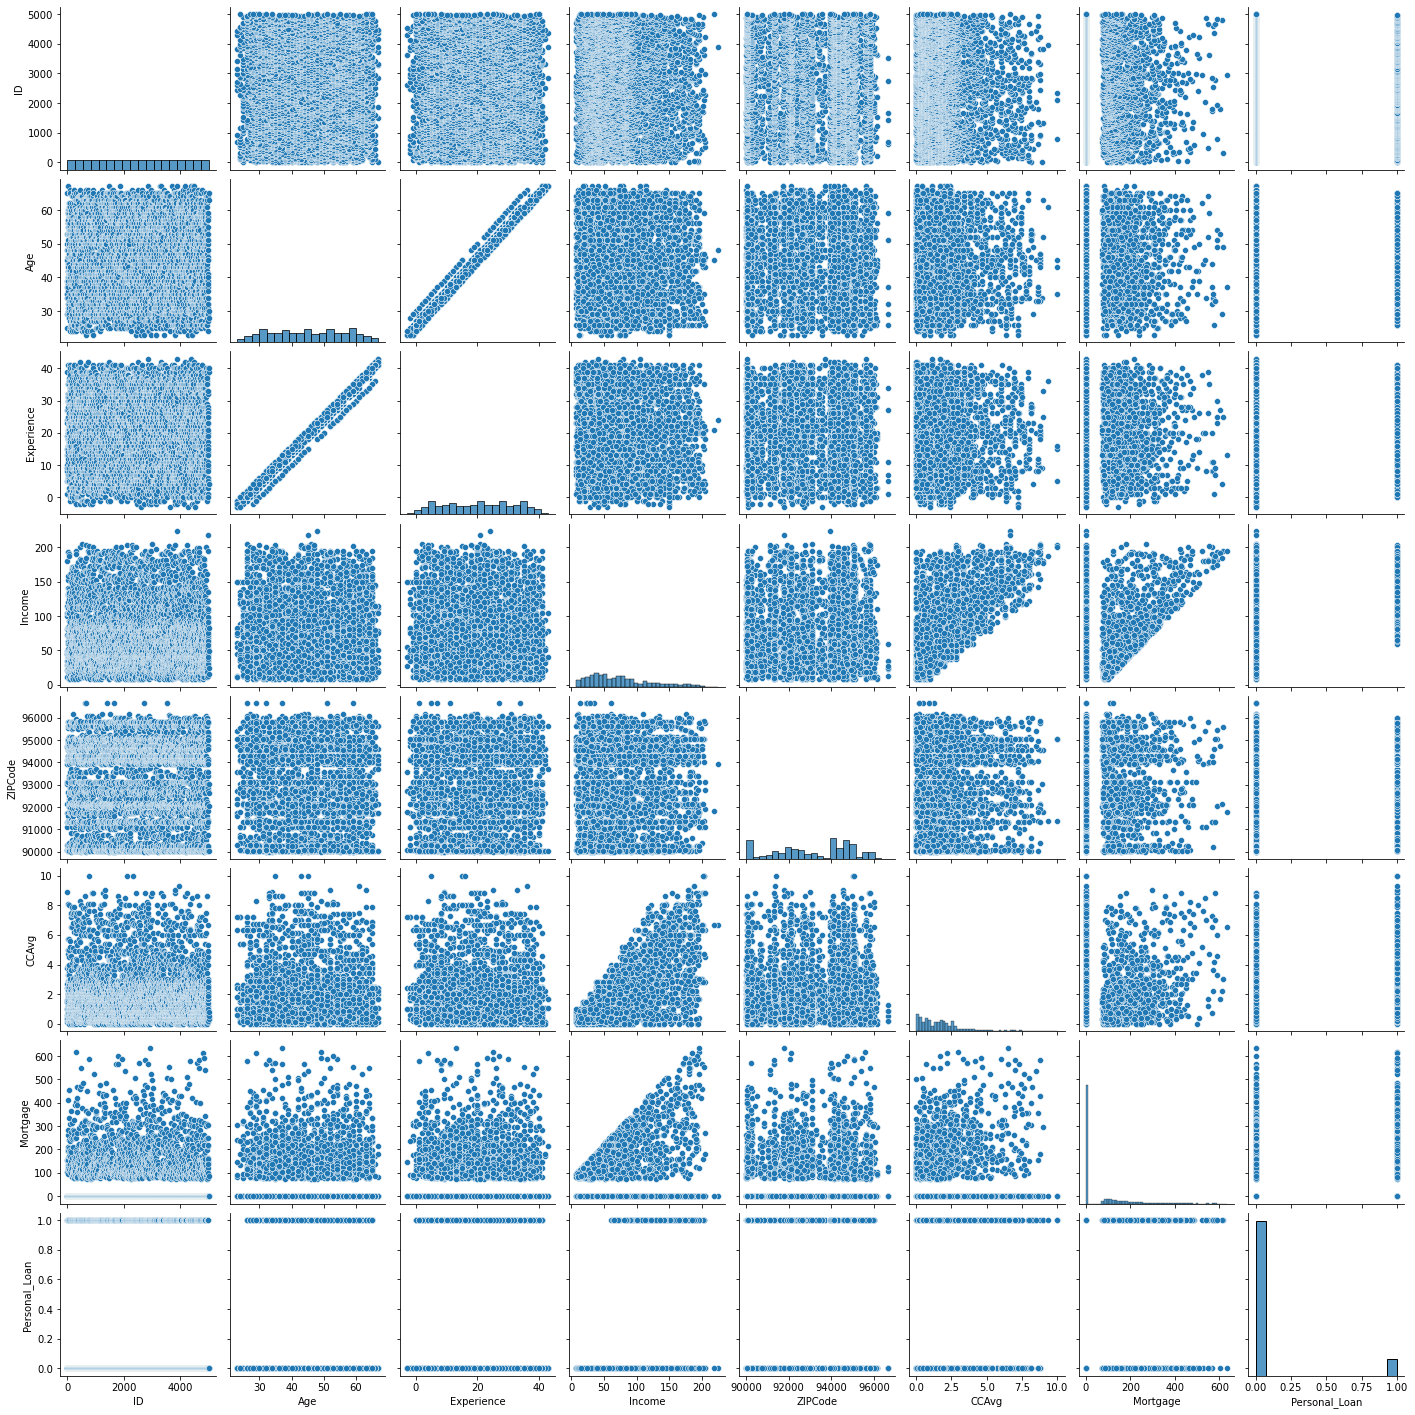

In [35]:
#Create a pairplot on the loan strategy data frame and display the output.
sns.pairplot(df)
plt.show()

Observations:
1. Higher the income, higher is the credit card spending.
2. Higher the income, higher is the mortgage.
3. Higher age leads to more experienced customers.

#### 5.2 Find correlation among columns to justify above observations

In [36]:
#find correlation among columns
correlation = df.corr()
correlation

,ID,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.024675,-0.013920,-0.024801
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.052012,-0.012539,-0.007726
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.050077,-0.010582,-0.007413
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,0.645984,0.206806,0.502462
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,-0.012188,0.003614,-0.002974
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,1.000000,0.109905,0.366889
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,0.109905,1.000000,0.142095
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.366889,0.142095,1.000000


Observations: 
1. There is a negative correlation betwen personal loan and age (very slight) and personal loan and experience.
2. There is a positive correlation between personal loan and income, personal loan and average credit card spending, and personal loan and mortgage.
3. The correlation between personal loan and credit card spending is decent enough.


#### 5.3 Heatmap of the correlation among columns

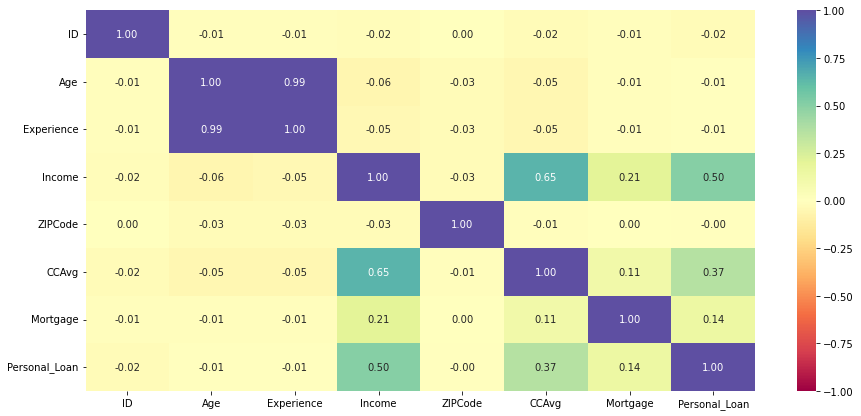

In [37]:
#Here we are drawing a heatmap of the correlation matrix in the previous step and each variable's correlation is shown with corresponding columns
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, 
            fmt=".2f", cmap="Spectral")
plt.show()

Observations:
1. Age and experience have a strong correlation. 
2. Income and credit card spending, income and personal loan have medium correlation.

<AxesSubplot:xlabel='Income'>

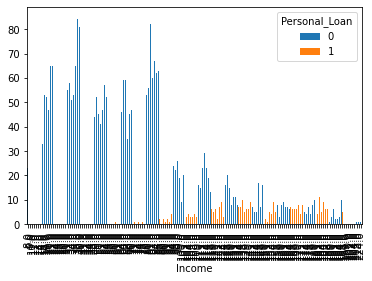

In [109]:
#A crosstab to show whether the customer bought the loan last time based on their income
pd.crosstab(df['Income'],df['Personal_Loan']).plot.bar()

This shows that high income group people took loans, whereas low income group people did not take loans.

<AxesSubplot:xlabel='Family'>

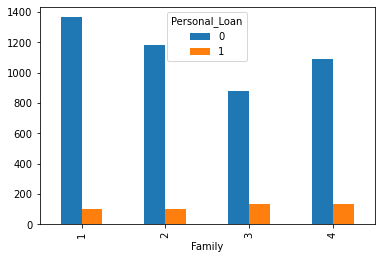

In [112]:
#A crosstab to show whether the customer bought the loan last time based on their family size.
pd.crosstab(df['Family'],df['Personal_Loan']).plot.bar()

This shows that single people took least number of loans, and as family size increased, people tend to take more loans.

<AxesSubplot:xlabel='CCAvg'>

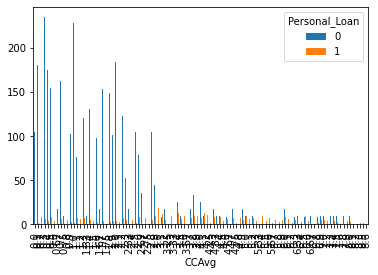

In [113]:
#A crosstab to show whether the customer bought the loan last time based on their credit card utilization.
pd.crosstab(df['CCAvg'],df['Personal_Loan']).plot.bar()

This shows that when credit card utlization is low, people take less loan, and when credit card utilization is high, people take more loans>

### 6. Data preprocessing

In [38]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,1.937938,56.498800,0.096000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.747659,101.713802,0.294621
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000,1.000000


#### 6.1 Let's preprocess the outliers for our income column

<AxesSubplot:>

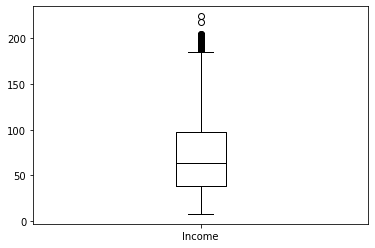

In [39]:
#Boxplot of the income of our vehicles.
df.boxplot(column=['Income'], grid=False, color='black')

In [40]:
quartiles = np.quantile(df['Income'][df['Income'].notnull()], [.25, .75])
income_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {income_4iqr}')
outlier_income = df.loc[np.abs(df['Income'] - df['Income'].median()) > income_4iqr, 'Income']
outlier_income

Q1 = 39.0, Q3 = 98.0, 4*IQR = 236.0


Series([], Name: Income, dtype: int64)

4IQR is $236K  and  75 percent of our customers earn less than $98K. So we can remove those over $98K.

In [41]:
df.loc[np.abs(df['Income'] - df['Income'].median()) > income_4iqr, 'Income'] = np.nan

In [42]:
# dropping these rows
# [not run]
df.drop(outlier_income.index, axis=0, inplace=True)

In [43]:
income = df['Income'][df['Income'].notnull()]

print(income.mean())  # the mean is being pulled
print(income.median())

73.7742
64.0


#### 6.2 Preprocessing outliers of our column credit card spendings

<AxesSubplot:>

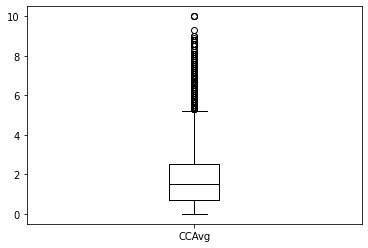

In [44]:
#Boxplot of the average credit card spending of our customers.
df.boxplot(column=['CCAvg'], grid=False, color='black')

In [45]:
quartiles = np.quantile(df['CCAvg'][df['CCAvg'].notnull()], [.25, .75])
cc_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {cc_4iqr}')
outlier_cc = df.loc[np.abs(df['CCAvg'] - df['CCAvg'].median()) > cc_4iqr, 'CCAvg']
outlier_cc

Q1 = 0.7, Q3 = 2.5, 4*IQR = 7.2


9        8.9
787     10.0
881      8.8
917      8.8
1277     8.8
1339     9.0
2101    10.0
2337    10.0
2447     8.8
2769     8.8
2988     8.8
3312     8.8
3804     8.8
3822     9.0
3943     9.3
4225     8.8
Name: CCAvg, dtype: float64

4IQR is $7.2K, and our 75% customers have credit card spendings as $2.5k, so we can remove those over $2.5K

In [46]:
df.loc[np.abs(df['CCAvg'] - df['CCAvg'].median()) > cc_4iqr, 'CCAvg'] = np.nan

In [47]:
# dropping these rows
# [not run]
df.drop(outlier_cc.index, axis=0, inplace=True)

In [48]:
cc = df['CCAvg'][df['CCAvg'].notnull()]

print(cc.mean())  # the mean is being pulled
print(cc.median())

1.914985955056185
1.5


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4984 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  4984 non-null   int64   
 1   Age                 4984 non-null   int64   
 2   Experience          4984 non-null   int64   
 3   Income              4984 non-null   float64 
 4   ZIPCode             4984 non-null   int64   
 5   Family              4984 non-null   category
 6   CCAvg               4984 non-null   float64 
 7   Education           4984 non-null   category
 8   Mortgage            4984 non-null   int64   
 9   Personal_Loan       4984 non-null   int64   
 10  Securities_Account  4984 non-null   category
 11  CD_Account          4984 non-null   category
 12  Online              4984 non-null   category
 13  CreditCard          4984 non-null   category
dtypes: category(6), float64(2), int64(6)
memory usage: 380.5 KB


In [50]:
#Let's create a backup of our original data frame in case we need to use it again
df1 = df.copy()
df1

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49.0,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34.0,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11.0,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100.0,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45.0,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15.0,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24.0,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49.0,90034,3,0.5,2,0,0,0,0,1,0


### 6.0 Model Building - Logistic Regression

#### 6.1 Creating dummy variables

In [51]:
df_updated = pd.get_dummies(df, columns=['Family','Education','Securities_Account', 'CD_Account','Online','CreditCard'],drop_first=True)
df_updated.head()

,ID,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
0,1,25,1,49.0,91107,1.6,0,0,0,0,1,0,0,1,0,0,0
1,2,45,19,34.0,90089,1.5,0,0,0,1,0,0,0,1,0,0,0
2,3,39,15,11.0,94720,1.0,0,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100.0,94112,2.7,0,0,0,0,0,1,0,0,0,0,0
4,5,35,8,45.0,91330,1.0,0,0,0,0,1,1,0,0,0,0,1


#### 6.2 Split the data set on 70-30 ratio.

In [52]:
X = df_updated.drop('Personal_Loan',axis=1)     # Predictor feature columns (8 X m)
Y = df_updated['Personal_Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,ID,Age,Experience,Income,ZIPCode,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
1967,1968,43,18,89.0,94303,0.5,108,0,1,0,0,1,0,0,0,1
665,666,54,24,61.0,92866,2.0,0,0,0,1,0,1,1,0,1,0
4233,4234,32,7,134.0,95929,3.3,0,1,0,0,0,0,0,0,1,0
3799,3800,37,11,44.0,93109,0.2,0,0,0,1,0,0,0,0,0,1
2096,2097,55,29,54.0,95051,2.3,93,1,0,0,0,1,0,0,0,0


Let's check the split of the data

In [53]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_updated.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_updated.index)) * 100))

69.98% data is in training set
30.02% data is in test set


Now let's check True False in training and testing data set for personal loan column

In [54]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df_updated.loc[df_updated['Personal_Loan'] == 1]), (len(df_updated.loc[df_updated['Personal_Loan'] == 1])/len(df_updated.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df_updated.loc[df_updated['Personal_Loan'] == 0]), (len(df_updated.loc[df_updated['Personal_Loan'] == 0])/len(df_updated.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 472 (9.47%)
Original Personal Loan False Values   : 4512 (90.53%)

Training Personal Loan True Values    : 327 (9.38%)
Training Personal Loan False Values   : 3161 (90.62%)

Test Personal Loan True Values        : 145 (9.69%)
Test Personal Loan False Values       : 1351 (90.31%)



#### 6.3 Starting the Logistic Regression Model

In [55]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


In [56]:
model_score = model.score(x_test, y_test)
print(model_score)

0.910427807486631


Observation - We have got a model score of 91% on the testing data set which means that we have predicted 91% customers correctly who will buy the loan, which is very good.

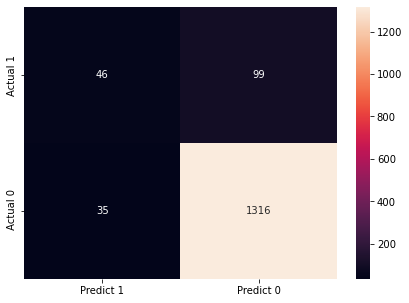

In [57]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

The confusion matrix - Observations
1. Among the personal loan column, there are 35 customers for whom we predicted they would take a loan, but they did not take a loan (False Positive - Type 1 Error).
2. There are 46 customers who we predicted would take a loan and actually took a loan (True Positive).
3. There are 99 customers who we did not predict would take a loan, but ended up taking a loan (False Negative - Type 2 error).
4. There are 1316 customers who we did not predict would take a loan and did not take a loan (True Negative).

In [58]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

        0         1       2         3         4         5         6         7  \
0 -0.0001  0.000721  0.0005  0.036772 -0.000064  0.001316  0.000874 -0.000238   

          8         9        10        11       12        13        14  \
0  0.000224  0.000231  0.000297  0.000372  0.00005  0.000335 -0.000034   

         15  intercept  
0 -0.000014  -0.000003  


In [59]:
coef_df1 = pd.DataFrame(
    np.append(model.coef_, model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,0
0,-0.000100
1,0.000721
2,0.000500
3,0.036772
4,-0.000064
5,0.001316
6,0.000874
7,-0.000238
8,0.000224
9,0.000231


Observation - The above values show the coefficients of the logistic regression model. The columns which have negative coefficient, which means that an increase in value in these coefficients will lead to chances that the person not buying the loan. The columns which have positive coefficient, which means that an increase in value in these coefficients will lead to more chances that a person will buy the loan.

Observations on model performance:

1. Precision (P) - Number of positive patterns predicted correctly, by total number of patterns in positive class. It measures how good our model is when the prediction is positive.
 
              P = TP / (TP + FP) = 46 / 81
              
2. Recall (R) - It measures how good our model is at correctly predicting positive classes.

            R = TP / (TP + FN) = 46 / 145
            
3. F1 score - Harmonic mean of P and R.

    F1 score = (2 X P X R) / (P+R) = [2X(46/81)X(46/145)]/[(46/81)+(46/145)]
             

#### 6.4 Which metric is right for our modeling? 

We will use accuracy as our metric of choice. The reason is that we want to able to correctly predict those customers who will buy our loan scheme, since they will generate revenue through interests.

We want to only target those who will buy the loan, so imrpoving true positives is the key here as we want to improve the predictions of finding the customers who will buy the loan.

#### 6.5 Improving the model performance

In [66]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

ROC AOC curve on training set

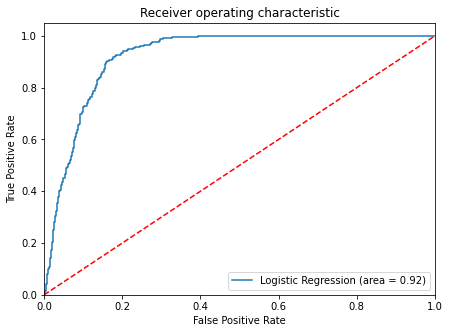

In [67]:
logit_roc_auc_train = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

ROC AOC on test data

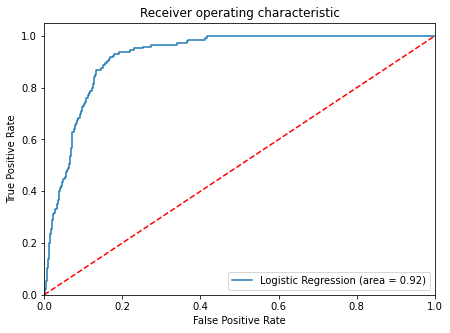

In [68]:
logit_roc_auc_test = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

We get similar performance

Optimal Threshold using ROC AOC curve

In [74]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.07906322700265499


In [75]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [76]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model, x_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.828842,0.920489,0.345183,0.502085


Checking performance on testing data set

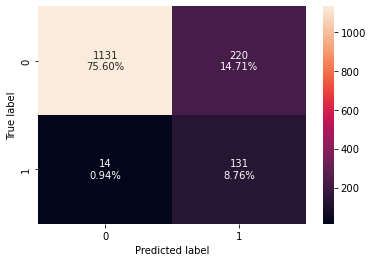

In [77]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    model, x_test, y_test, threshold=optimal_threshold_auc_roc
)

In [79]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model, x_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.843583,0.903448,0.373219,0.528226


We got accuracy of 82% on the training data set and 84% on the testing data set. Here the threshold was 0.5

#### 6.6 Model improvement by changing the threshold, but first we find the optimal threshold

Let's use precision recall curve to find better threshold

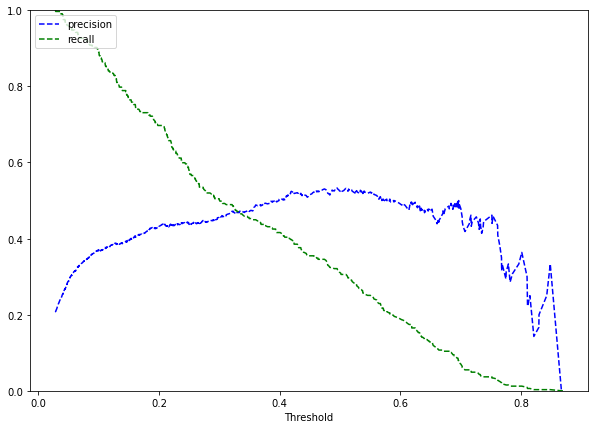

In [80]:
y_scores = model.predict_proba(x_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

The best threshold points to somewhere around 0.35, and not 0.5

In [81]:
# setting the threshold
optimal_threshold_curve = 0.35

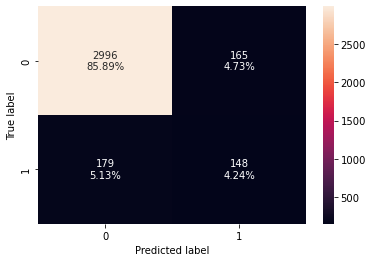

In [82]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    model, x_train, y_train, threshold=optimal_threshold_curve
)

In [83]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    model, x_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.901376,0.452599,0.472843,0.4625


In [84]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    model, x_test, y_test, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.903743,0.448276,0.503876,0.474453


We have got accuracy of 90% in both training and testing data set after finding the optimal threshold.

#### Model Performance Summary

So when we had the threshold as 0.5, our accuracy was around 82-84% on the training and testing data set.

After finding the optimal threshold of 0.35, our accuracy increased to 90% for the training and testing data set.

# 7.0 Model Building using Decision Trees 

In [85]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [86]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [87]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [88]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

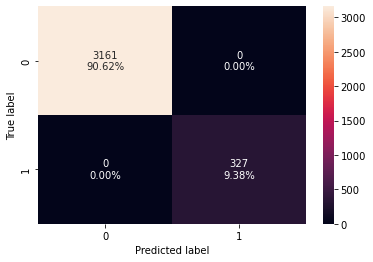

In [89]:
confusion_matrix_sklearn(model, x_train, y_train)

In [90]:
decision_tree_perf_train = get_recall_score(model, x_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


We get a recall score of 1, which means the model will be overfitted.

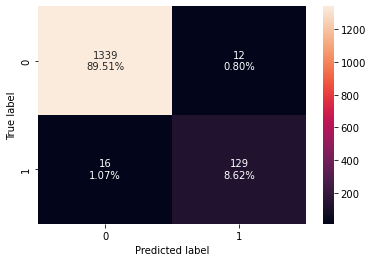

In [91]:
confusion_matrix_sklearn(model, x_test, y_test)

In [92]:
decision_tree_perf_test = get_recall_score(model, x_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8896551724137931


On the training data set, the recall score is 1, while on the testing data set, the recall score is 0.889.

There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

#### 7.1 Visualizing the decision tree

In [93]:
## creating a list of column names
feature_names = x_train.columns.to_list()

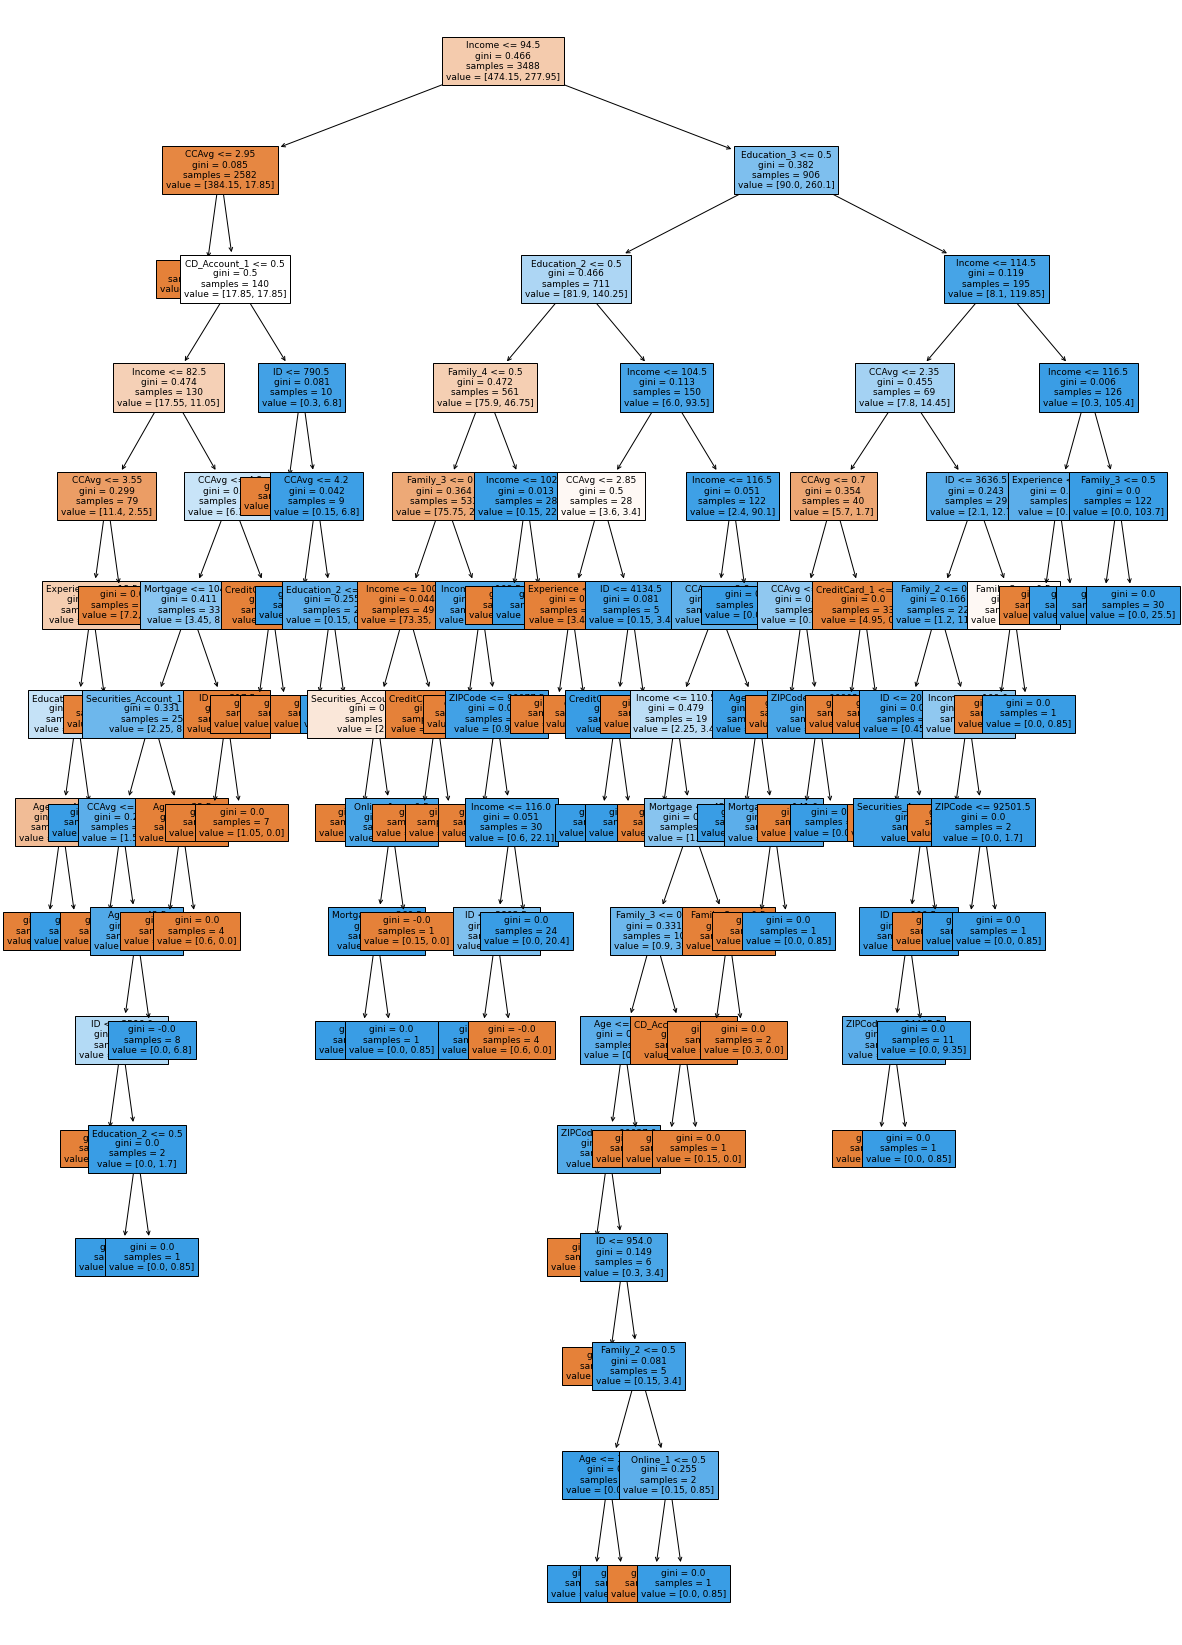

In [94]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [95]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 94.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [366.30, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |--- Experience <= 18.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- Age <= 42.50
|   |   |   |   |   |   |   |   |--- weights: [1.80, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  42.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |--- Experience >  18.50
|   |   |   |   |   |   |--- weights: [2.40, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |--- weights: [7.20, 0.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- Mortgage <= 104.50
|   |   |   |   |   |   |--- Securities_Ac

The tree above is very complex and difficult to interpret.

In [96]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                               Imp
Income                5.696287e-01
Education_2           1.012534e-01
CCAvg                 8.748012e-02
Family_3              8.515911e-02
Family_4              6.090003e-02
Education_3           4.320389e-02
ID                    1.109689e-02
CD_Account_1          1.059751e-02
Securities_Account_1  8.270921e-03
Mortgage              6.032625e-03
Age                   5.680092e-03
Experience            4.488371e-03
ZIPCode               3.810471e-03
Online_1              1.514232e-03
Family_2              8.836661e-04
CreditCard_1          4.307571e-16


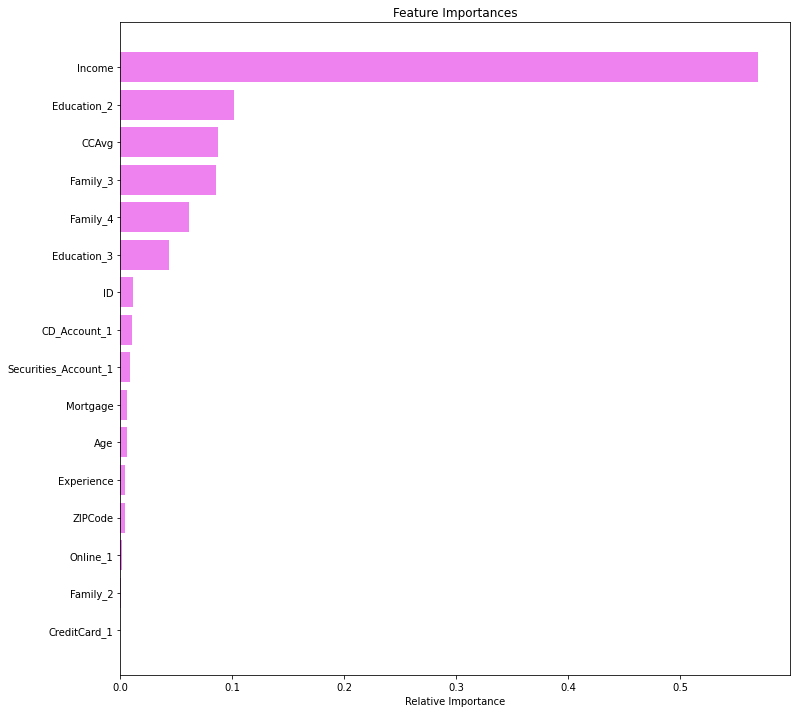

In [97]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In the overfitted model, income is the most important feature, followed by education and average credit card spending.

#### 7.2 Reducing overfitting

Using GridSearch for Hyperparameter tuning of our tree model

In [98]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1)

#### Checking performance on training set

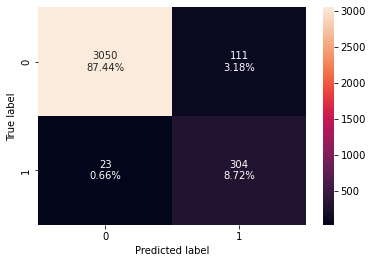

In [99]:
confusion_matrix_sklearn(estimator, x_train, y_train)

In [100]:
decision_tree_tune_perf_train = get_recall_score(estimator, x_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9296636085626911


From the overfitted model where the recall score on training data was 1, we now have a recall score of 0.92

#### Checking performance on test set

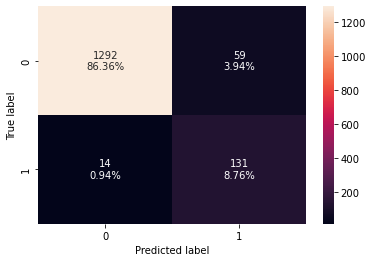

In [101]:
confusion_matrix_sklearn(estimator, x_test, y_test)

In [102]:
decision_tree_tune_perf_test = get_recall_score(estimator, x_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.903448275862069


The recall score on testing data after improvement is 0.9

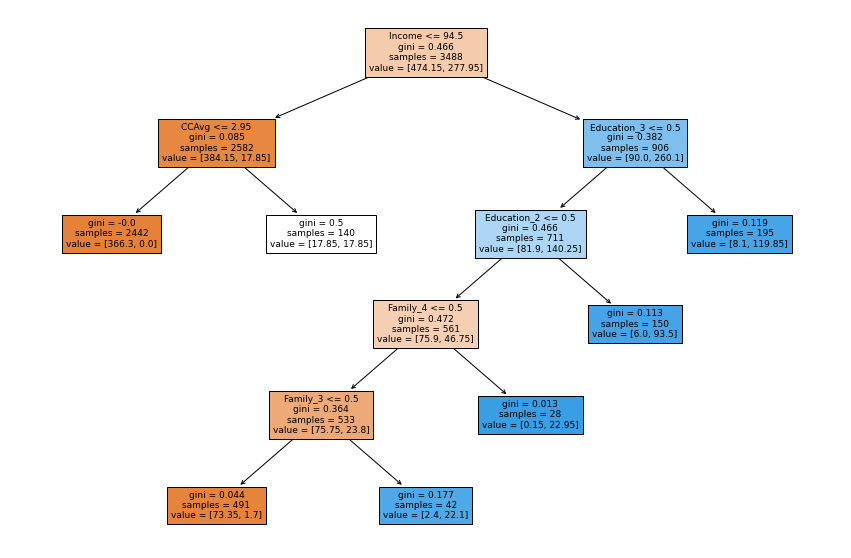

In [103]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [104]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 94.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [366.30, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [17.85, 17.85] class: 0
|--- Income >  94.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- weights: [73.35, 1.70] class: 0
|   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |--- weights: [2.40, 22.10] class: 1
|   |   |   |--- Family_4 >  0.50
|   |   |   |   |--- weights: [0.15, 22.95] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [6.00, 93.50] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [8.10, 119.85] class: 1



#### Observations from the tree:

If the income is greater than $94.5K, and education is greater than 0.5, and family size is greater than 0.5, then the customer will take the loan scheme.

In [105]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                           Imp
Income                0.612381
Education_2           0.114935
Family_3              0.095797
Family_4              0.071571
CCAvg                 0.054542
Education_3           0.050774
ID                    0.000000
Age                   0.000000
Experience            0.000000
ZIPCode               0.000000
Mortgage              0.000000
Family_2              0.000000
Securities_Account_1  0.000000
CD_Account_1          0.000000
Online_1              0.000000
CreditCard_1          0.000000


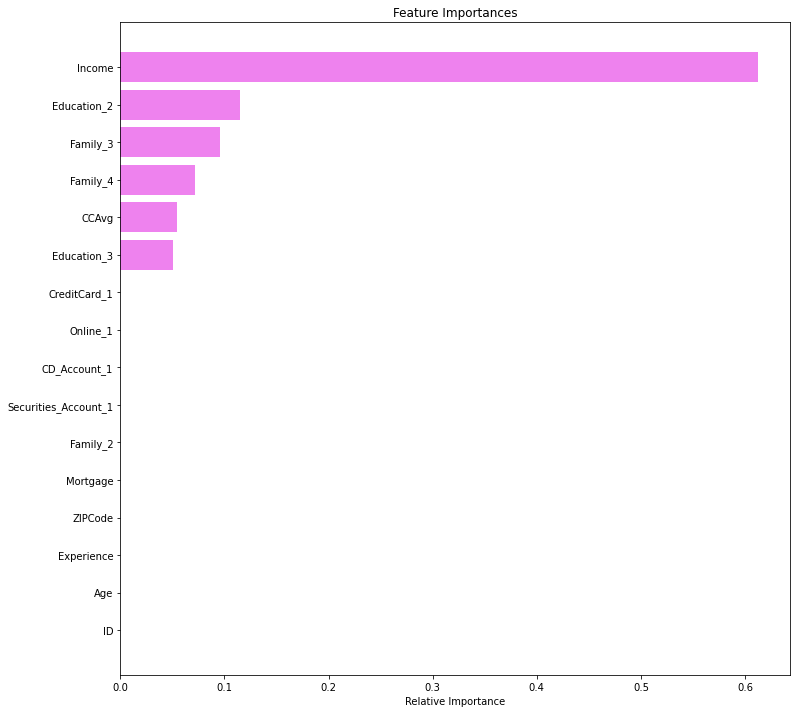

In [106]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

We see from the above graph that income, education_2 and family_3 are the most important features.

Observations from the decision tree before and after pruning:

1. The recall has improved from 1.0 to 0.9, which means that now the tree is less overfitted after we have used hyper parameters.

# Comparing decision trees and logistic regression

In our logistic regression model, the recall was around 0.44.

In decision tree without hyper parameters, the recall was 1, which was heavily overfitted.

After using hyper parameters, the recall (on both the training and testing data set) came down to 0.9

Here the recall represents correctly identifying those customers who could have taken the loan, compared to those who took the loan irrespective of our prediction.

# Actionable insights and Recommendations to the business

1. Focus on the parameters income, education and family size of the customer to target schemes to lure them to buying the loan scheme.

2. If the income is greater than $94.5K, and education is greater than 0.5, and family size is greater than 0.5, then the customer will take the loan scheme.

3. We have got a 90% accurate model using the logistic regression algorithm to predict whether customers will buy the loan scheme or not. So use that model in predicting what the customers will do.

4. Target medium to high income customers, who have larger family size and whose credit card utilization is higher.